# Load Data

In [1]:
import pandas as pd

# Load dataset
file_path = "Journal.csv"  # Update with your actual file path
df = pd.read_csv(file_path)

# Show basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 30 non-null     object 
 1   Sleep (hrs)          27 non-null     float64
 2   Exercise (hrs)       25 non-null     float64
 3   Book (hrs)           24 non-null     float64
 4   Study (hrs)          26 non-null     float64
 5   Entertainment (hrs)  27 non-null     float64
 6   Mood                 27 non-null     float64
 7   Feelings             27 non-null     object 
 8   Weight (kg)          28 non-null     float64
 9   Goals                28 non-null     object 
 10  Menstrual Cycle      27 non-null     object 
dtypes: float64(7), object(4)
memory usage: 2.7+ KB


,Date,Sleep (hrs),Exercise (hrs),Book (hrs),Study (hrs),Entertainment (hrs),Mood,Feelings,Weight (kg),Goals,Menstrual Cycle
0,03/01/25,8.0,NaN,NaN,NaN,2.0,-2.0,Indiferent,64.2,ujuhiuwsh,Follicular
1,03/02/25,8.0,NaN,NaN,4.0,4.0,-1.0,Indiferent,64.0,vyuhvikaw,Follicular
2,03/03/25,7.0,0.25,NaN,5.0,1.0,1.0,"Grateful, Fine",63.8,wgsyuxhv,Follicular
3,03/04/25,5.0,1.00,2.00,6.0,2.0,2.0,"Frustrated, Angry, Fine",63.3,1.Innitiate Travel & life tracker Analysis Pro...,Ovuliation
4,03/05/25,6.0,0.50,0.25,3.0,0.5,3.0,Fine,63.4,"1. Populate Travel analysis, 2. Power BI, 3. F...",Ovuliation


In [2]:
#rename column headers
df.columns = ["date", "sleep_hrs", "exercise_hrs", "book_hrs", "study_hrs", 
              "entertainment_hrs", "mood_score", "feelings", "weight_kgs", "goals", "menstrual_phase"]


# Data Cleaning & Processing 

In [3]:
# Check missing values
print(df.isnull().sum())

# Drop rows with missing values or fill them
df.dropna(subset=['goals'], inplace=True)  # Removing NaN from Goals column
df.fillna(0, inplace=True)  # Fill remaining NaNs with 0


date                 0
sleep_hrs            3
exercise_hrs         5
book_hrs             6
study_hrs            4
entertainment_hrs    3
mood_score           3
feelings             3
weight_kgs           2
goals                2
menstrual_phase      3
dtype: int64


In [4]:
#Convert Strings into datetime
df['Date'] = pd.to_datetime(df['date'], format='%m/%d/%y')
# Show basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               28 non-null     object        
 1   sleep_hrs          28 non-null     float64       
 2   exercise_hrs       28 non-null     float64       
 3   book_hrs           28 non-null     float64       
 4   study_hrs          28 non-null     float64       
 5   entertainment_hrs  28 non-null     float64       
 6   mood_score         28 non-null     float64       
 7   feelings           28 non-null     object        
 8   weight_kgs         28 non-null     float64       
 9   goals              28 non-null     object        
 10  menstrual_phase    28 non-null     object        
 11  Date               28 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(7), object(4)
memory usage: 2.8+ KB


,date,sleep_hrs,exercise_hrs,book_hrs,study_hrs,entertainment_hrs,mood_score,feelings,weight_kgs,goals,menstrual_phase,Date
0,03/01/25,8.0,0.00,0.00,0.0,2.0,-2.0,Indiferent,64.2,ujuhiuwsh,Follicular,2025-03-01
1,03/02/25,8.0,0.00,0.00,4.0,4.0,-1.0,Indiferent,64.0,vyuhvikaw,Follicular,2025-03-02
2,03/03/25,7.0,0.25,0.00,5.0,1.0,1.0,"Grateful, Fine",63.8,wgsyuxhv,Follicular,2025-03-03
3,03/04/25,5.0,1.00,2.00,6.0,2.0,2.0,"Frustrated, Angry, Fine",63.3,1.Innitiate Travel & life tracker Analysis Pro...,Ovuliation,2025-03-04
4,03/05/25,6.0,0.50,0.25,3.0,0.5,3.0,Fine,63.4,"1. Populate Travel analysis, 2. Power BI, 3. F...",Ovuliation,2025-03-05


In [5]:
# Summary statistics
print(df.describe())

# Check unique values in categorical columns
#convert the categorical values into numerical values
print(df['menstrual_phase'].value_counts())
print(df['feelings'].value_counts())

       sleep_hrs  exercise_hrs   book_hrs  study_hrs  entertainment_hrs  \
count  28.000000     28.000000  28.000000  28.000000          28.000000   
mean    6.500000      0.705357   0.741071   4.000000           1.589286   
std     1.835857      0.495599   0.571232   1.845916           0.850420   
min     0.000000      0.000000   0.000000   0.000000           0.000000   
25%     5.750000      0.250000   0.437500   3.000000           1.000000   
50%     7.000000      0.500000   0.500000   4.000000           1.500000   
75%     8.000000      1.000000   1.000000   5.000000           2.000000   
max    10.000000      1.500000   2.000000   7.000000           4.000000   

       mood_score  weight_kgs  
count   28.000000   28.000000  
mean     0.500000   61.095000  
std      2.099383    1.892591  
min     -3.000000   57.990000  
25%     -1.000000   59.542500  
50%      1.000000   61.095000  
75%      2.000000   62.647500  
max      4.000000   64.200000  
Luteal        8
Ovuliation    7
Foll

In [6]:
print(df.describe())  # Shows mean, min, max, etc., for numerical columns


       sleep_hrs  exercise_hrs   book_hrs  study_hrs  entertainment_hrs  \
count  28.000000     28.000000  28.000000  28.000000          28.000000   
mean    6.500000      0.705357   0.741071   4.000000           1.589286   
std     1.835857      0.495599   0.571232   1.845916           0.850420   
min     0.000000      0.000000   0.000000   0.000000           0.000000   
25%     5.750000      0.250000   0.437500   3.000000           1.000000   
50%     7.000000      0.500000   0.500000   4.000000           1.500000   
75%     8.000000      1.000000   1.000000   5.000000           2.000000   
max    10.000000      1.500000   2.000000   7.000000           4.000000   

       mood_score  weight_kgs  
count   28.000000   28.000000  
mean     0.500000   61.095000  
std      2.099383    1.892591  
min     -3.000000   57.990000  
25%     -1.000000   59.542500  
50%      1.000000   61.095000  
75%      2.000000   62.647500  
max      4.000000   64.200000  


### Split Dataset

In [7]:
# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 
# Store the features in variable X (uppercase as there are multiple features)

# Features are variables that affect the target/label
# So, it's all the columns excluding the target column f
# You might want to experiment with both the full set and the best features
# However random_state=2 # pass an int for reproducible rtesult
                                                   
feature_cols = ['sleep_hrs', 'exercise_hrs', 'book_hrs', 'study_hrs', 
                'entertainment_hrs', 'mood_score', 'weight_kgs']

X = df[feature_cols]
#print('X:\n', X)

# Store the labels/target in variable y (lower case as its a single value)
y = df['mood_score']
#print('y:\n', y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # keep 20% for testing
                                                    random_state=2 # pass an int for reproducible rtesult
                                                    )

## Train a Model (Linear Regression)

In [8]:
from sklearn.linear_model import LinearRegression
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred

array([-1.00000000e+00, -2.00000000e+00,  1.08426079e-15,  1.00000000e+00,
       -3.00000000e+00, -2.00000000e+00])

### Evalution (Performance Score )

In [9]:
from sklearn.metrics import mean_squared_error, r2_score
# Model Performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.2f}")  # Closer to 1 means better fit
print(f"Mean Squared Error: {mse:.2f}")  # Lower is better

R² Score: 1.00
Mean Squared Error: 0.00


# EDA

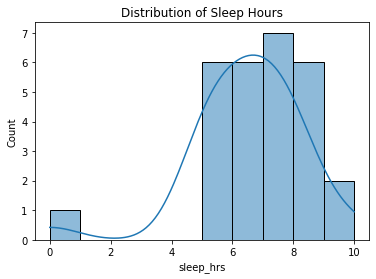

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram of Sleep Hours
sns.histplot(df['sleep_hrs'], bins=10, kde=True)
plt.title('Distribution of Sleep Hours')
plt.show()


# Visualization

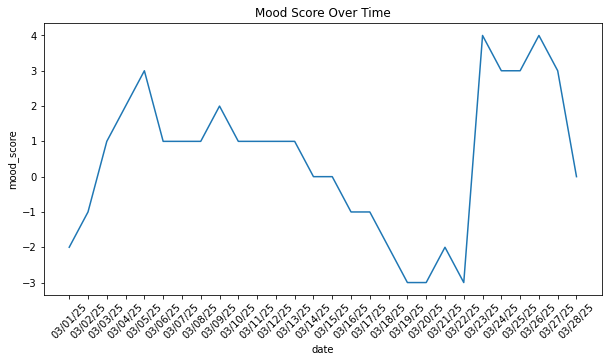

In [11]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df['date'], y=df['mood_score'])
plt.title('Mood Score Over Time')
plt.xticks(rotation=45)
plt.show()

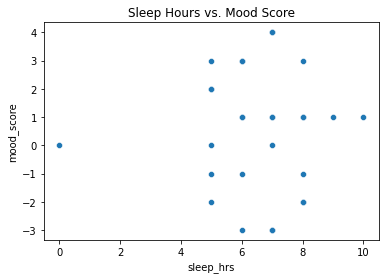

In [12]:
sns.scatterplot(x=df['sleep_hrs'], y=df['mood_score'])
plt.title('Sleep Hours vs. Mood Score')
plt.show()

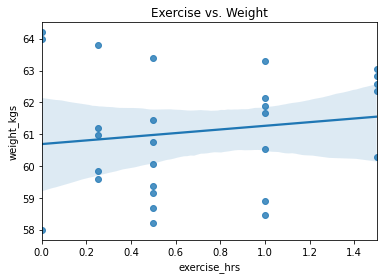

In [13]:
sns.regplot(x=df['exercise_hrs'], y=df['weight_kgs'])
plt.title('Exercise vs. Weight')
plt.show()


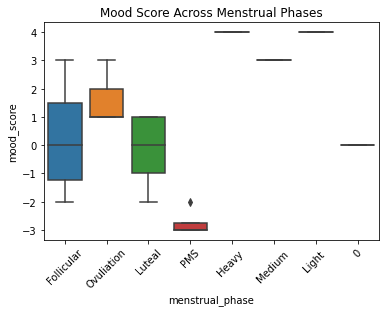

In [14]:
sns.boxplot(x=df['menstrual_phase'], y=df['mood_score'])
plt.title('Mood Score Across Menstrual Phases')
plt.xticks(rotation=45)
plt.show()

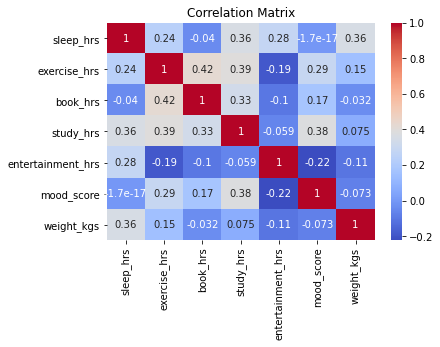

In [15]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

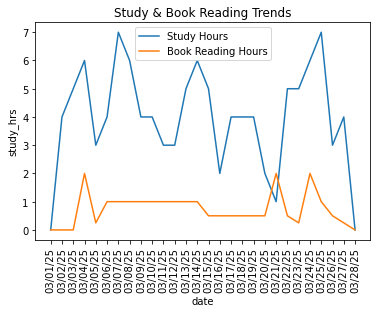

In [16]:
sns.lineplot(x=df['date'], y=df['study_hrs'], label="Study Hours")
sns.lineplot(x=df['date'], y=df['book_hrs'], label="Book Reading Hours")
plt.legend()
plt.title("Study & Book Reading Trends")
plt.xticks(rotation=90)
plt.show()